2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

#### **1. Accuracy**

**Example:** **Quality Control in Manufacturing**

- **Use Case:** Inspecting products on an assembly line to classify them as "defective" or "non-defective."
  
- **Rationale:** When the majority of products are non-defective, accuracy provides a clear measure of the proportion of correctly identified items. It ensures that the overall quality remains high by correctly classifying most products.


#### **2. Sensitivity**

**Example:** **Cancer Screening Programs**

- **Use Case:** Identifying patients who have cancer through medical tests.
  
- **Rationale:** High sensitivity ensures that most individuals with cancer are correctly identified, minimizing the risk of false negatives. This is critical for timely treatment and improving patient outcomes.


#### **3. Specificity**

**Example:** **Legal Risk Assessments (Recidivism Prediction)**

- **Use Case:** Predicting whether a defendant is likely to reoffend to inform bail or sentencing decisions.
  
- **Rationale:** High specificity ensures that individuals who are not likely to reoffend are not incorrectly labeled as high-risk. This prevents unjust penalties and supports fair legal decisions.


#### **4. Precision**

**Example:** **Email Spam Filtering (Preventing Legitimate Email Loss)**

- **Use Case:** Classifying incoming emails as "spam" or "not spam."
  
- **Rationale:** High precision ensures that when an email is marked as spam, it is genuinely spam. This minimizes the chances of legitimate emails being wrongly filtered out, maintaining effective communication and user trust.



4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Initial DataFrame loaded:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249  

/tmp/ipykernel_70/1968006636.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/1968006636.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/1968006636.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

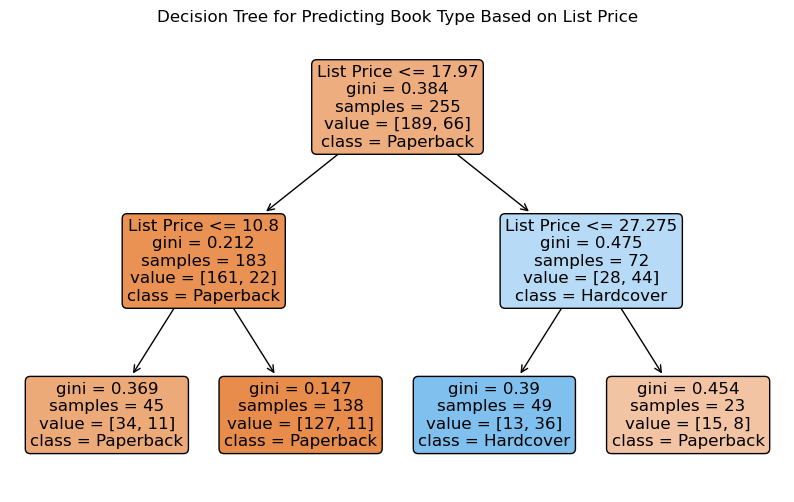


Decision tree visualization saved as 'decision_tree.pdf'.

Confusion Matrix:
[[40  4]
 [ 6 14]]


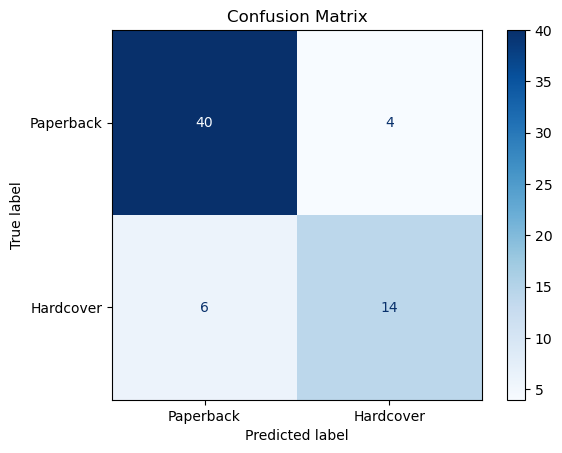


Classification Report:
              precision    recall  f1-score   support

   Paperback       0.87      0.91      0.89        44
   Hardcover       0.78      0.70      0.74        20

    accuracy                           0.84        64
   macro avg       0.82      0.80      0.81        64
weighted avg       0.84      0.84      0.84        64



In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay  # Added ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import graphviz as gv

# Step 0: Load the DataFrame from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
print("Initial DataFrame loaded:")
print(ab.head())

# Step 1: Data Preprocessing
# Remove 'Weight_oz', 'Width', and 'Height' columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
print(f"\nColumns after removal ({columns_to_remove}):")
print(ab_reduced.columns)

# Drop all rows with any remaining NaN entries
ab_reduced_noNaN = ab_reduced.dropna()
print(f"\nDataFrame shape after dropping NaN values: {ab_reduced_noNaN.shape}")

# Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display data types to confirm
print("\nData types after conversion:")
print(ab_reduced_noNaN.dtypes)

# Step 2: Split the Data into Training and Testing Sets (80/20)
# Using train_test_split from scikit-learn
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Alternatively, using df.sample (if preferred)
# train_fraction = 0.8
# ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_fraction, random_state=42)
# ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Report the number of observations in each set
print(f"\nNumber of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the test set: {ab_reduced_noNaN_test.shape[0]}")

# Step 3: Prepare the Target and Feature Variables
# Define target variable y and feature variable X
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X_train = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X_test = ab_reduced_noNaN_test[['List Price']]  # Feature: List Price

# Display the prepared variables
print("\nSample of target variable (y_train):")
print(y_train.head())
print("\nSample of feature variable (X_train):")
print(X_train.head())

# Step 4: Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 5: Train the Classifier Using the Training Data
clf.fit(X_train, y_train)
print("\nDecision Tree Classifier trained successfully.")

# Step 6: Visualize the Trained Decision Tree using plot_tree
plt.figure(figsize=(10,6))
plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Predicting Book Type Based on List Price")
plt.show()

# Optional: Display the Decision Rules using Graphviz
# Export the tree in DOT format
dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Generate graph using Graphviz
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Saves the tree as a PDF file named 'decision_tree.pdf'
print("\nDecision tree visualization saved as 'decision_tree.pdf'.")

# Step 7: Evaluate Model Performance
# Predict on the test set
y_pred = clf.predict(X_test)

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute and display classification report
class_report = classification_report(y_test, y_pred, target_names=['Paperback', 'Hardcover'])
print("\nClassification Report:")
print(class_report)


6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

Initial DataFrame loaded:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Height  Width  Thick  Weight_oz  
0    2010.0  1605506249  

/tmp/ipykernel_70/1079116424.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/1079116424.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/1079116424.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

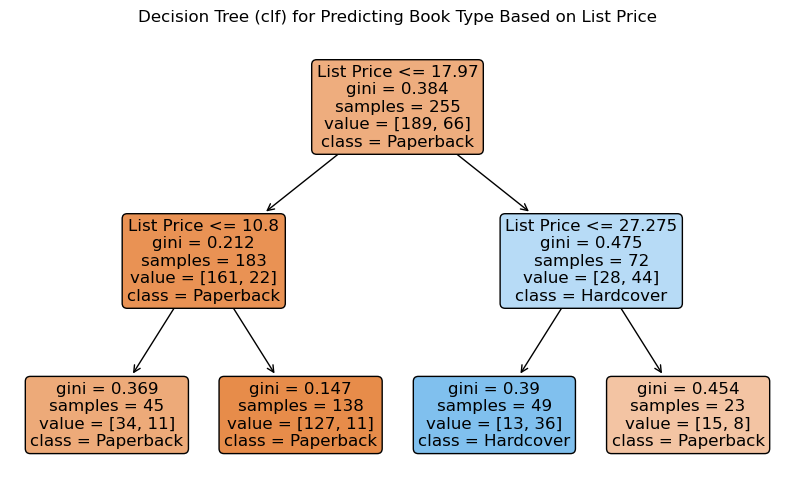


Decision tree visualization for clf saved as 'decision_tree_clf.pdf'.

Decision Tree Classifier (clf2) trained successfully.


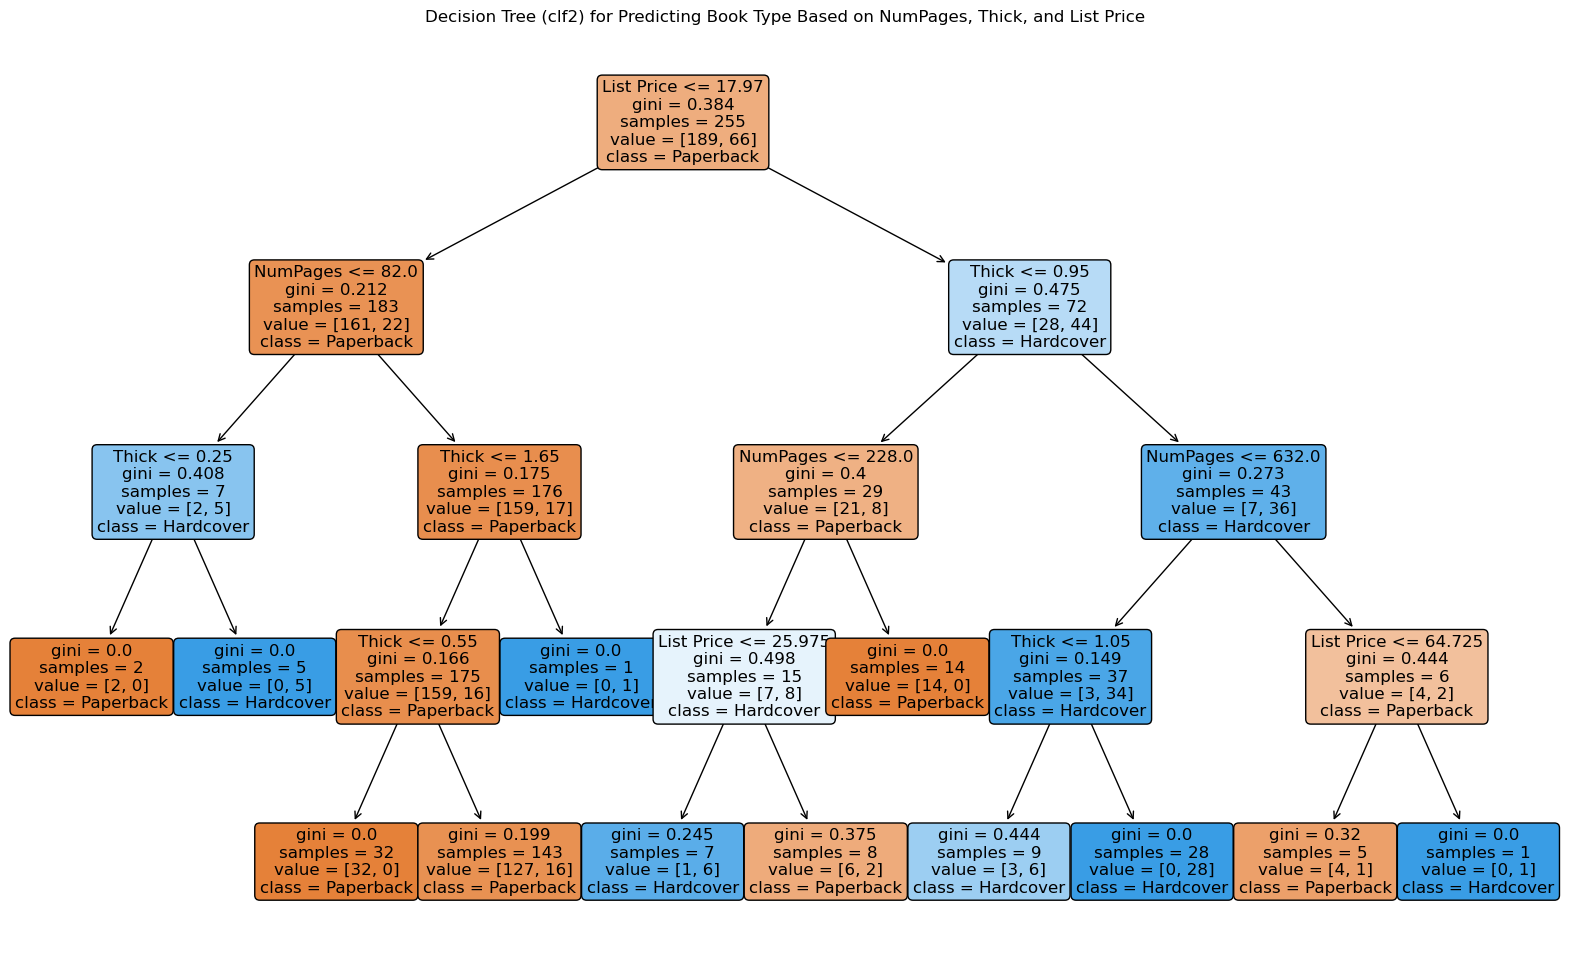


Decision tree visualization for clf2 saved as 'decision_tree_clf2.pdf'.


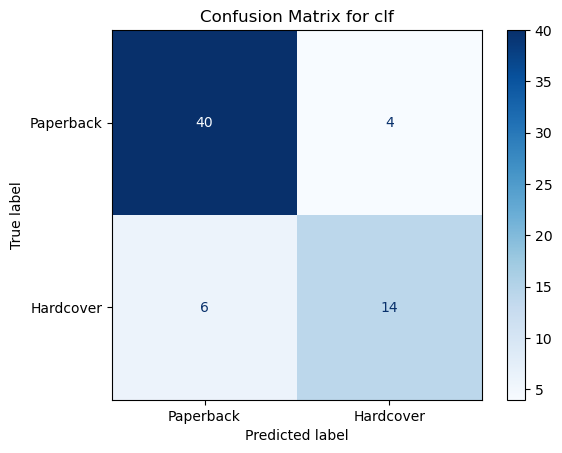

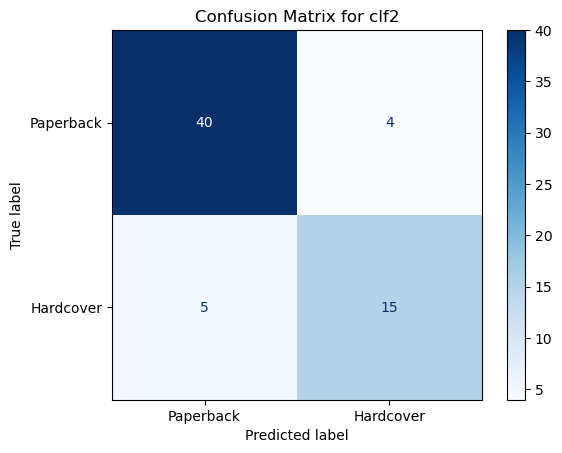


Performance Metrics:

Model clf:
Accuracy: 0.844
Sensitivity (Recall): 0.700
Specificity: 0.909

Model clf2:
Accuracy: 0.859
Sensitivity (Recall): 0.750
Specificity: 0.909


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score
import matplotlib.pyplot as plt
import graphviz as gv

# Step 0: Load the DataFrame from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
print("Initial DataFrame loaded:")
print(ab.head())

# Step 1: Data Preprocessing
# Remove 'Weight_oz', 'Width', and 'Height' columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
print(f"\nColumns after removal ({columns_to_remove}):")
print(ab_reduced.columns)

# Drop all rows with any remaining NaN entries
ab_reduced_noNaN = ab_reduced.dropna()
print(f"\nDataFrame shape after dropping NaN values: {ab_reduced_noNaN.shape}")

# Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display data types to confirm
print("\nData types after conversion:")
print(ab_reduced_noNaN.dtypes)

# Step 2: Split the Data into Training and Testing Sets (80/20)
# Using train_test_split from scikit-learn
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"\nNumber of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the test set: {ab_reduced_noNaN_test.shape[0]}")

# Step 3: Prepare the Target and Feature Variables
# Define target variable y and feature variable X for clf (using only 'List Price')
y_train_clf = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X_train_clf = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

y_test_clf = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Feature: List Price

# Display the prepared variables
print("\nSample of target variable (y_train_clf):")
print(y_train_clf.head())
print("\nSample of feature variable (X_train_clf):")
print(X_train_clf.head())

# Step 4: Initialize the DecisionTreeClassifier with max_depth=2 for clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 5: Train the Classifier Using the Training Data for clf
clf.fit(X_train_clf, y_train_clf)
print("\nDecision Tree Classifier (clf) trained successfully.")

# Step 6: Visualize the Trained Decision Tree for clf using plot_tree
plt.figure(figsize=(10,6))
plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree (clf) for Predicting Book Type Based on List Price")
plt.show()

# Optional: Display the Decision Rules using Graphviz for clf
# Export the tree in DOT format
dot_data_clf = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Generate graph using Graphviz for clf
graph_clf = graphviz.Source(dot_data_clf)  
graph_clf.render("decision_tree_clf")  # Saves the tree as a PDF file named 'decision_tree_clf.pdf'
print("\nDecision tree visualization for clf saved as 'decision_tree_clf.pdf'.")

# Step 7: Initialize and Train clf2 with multiple features
# Define target variable y and feature variable X for clf2 (using 'NumPages', 'Thick', 'List Price')
y_train_clf2 = y_train_clf.copy()
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

y_test_clf2 = y_test_clf.copy()
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

# Initialize the DecisionTreeClassifier with max_depth=4 for clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier using the training data for clf2
clf2.fit(X_train_clf2, y_train_clf2)
print("\nDecision Tree Classifier (clf2) trained successfully.")

# Step 8: Visualize the Trained Decision Tree for clf2 using plot_tree with rounded decimals
plt.figure(figsize=(20,12))
plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True,
    rounded=True,
    fontsize=12,
    precision=3  # Display decimal numbers with three significant digits
)
plt.title("Decision Tree (clf2) for Predicting Book Type Based on NumPages, Thick, and List Price")
plt.show()

# Optional: Display the Decision Rules using Graphviz for clf2
# Export the tree in DOT format
dot_data_clf2 = tree.export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Generate graph using Graphviz for clf2
graph_clf2 = graphviz.Source(dot_data_clf2)  
graph_clf2.render("decision_tree_clf2")  # Saves the tree as a PDF file named 'decision_tree_clf2.pdf'
print("\nDecision tree visualization for clf2 saved as 'decision_tree_clf2.pdf'.")

# Step 9: Make Predictions and Evaluate Both Models
# Predictions for clf
y_pred_clf = clf.predict(X_test_clf)

# Predictions for clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Compute confusion matrices
conf_matrix_clf = confusion_matrix(y_test_clf, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)

# Display confusion matrices using ConfusionMatrixDisplay
disp_clf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf2")
plt.show()

# Compute performance metrics
# For clf
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
sensitivity_clf = recall_score(y_test_clf, y_pred_clf)  # Recall is sensitivity for the positive class
specificity_clf = conf_matrix_clf[0,0] / (conf_matrix_clf[0,0] + conf_matrix_clf[0,1])

# For clf2
accuracy_clf2 = accuracy_score(y_test_clf2, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test_clf2, y_pred_clf2)  # Recall is sensitivity for the positive class
specificity_clf2 = conf_matrix_clf2[0,0] / (conf_matrix_clf2[0,0] + conf_matrix_clf2[0,1])

# Report the metrics
print("\nPerformance Metrics:")
print(f"\nModel clf:")
print(f"Accuracy: {accuracy_clf:.3f}")
print(f"Sensitivity (Recall): {sensitivity_clf:.3f}")
print(f"Specificity: {specificity_clf:.3f}")

print(f"\nModel clf2:")
print(f"Accuracy: {accuracy_clf2:.3f}")
print(f"Sensitivity (Recall): {sensitivity_clf2:.3f}")
print(f"Specificity: {specificity_clf2:.3f}")


7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are bett

The differences between the two confusion matrices arise because `clf2` utilizes additional predictor variables—`NumPages` and `Thick`—alongside `List Price`, allowing the model to capture more nuanced patterns in the data. By incorporating these extra features, `clf2` can make more informed decisions, reducing the number of misclassifications compared to `clf`, which relies solely on `List Price`. Consequently, the confusion matrix for `clf2` typically shows higher true positive and true negative rates, indicating improved sensitivity and specificity. Overall, both confusion matrices for `clf` and `clf2` are better than a simplistic model because they leverage relevant features to enhance prediction accuracy and reliability.

# Summaries

### **Summary**

In this analysis, we processed the Amazon Books dataset to predict whether a book is a hardcover or paperback. We began by removing irrelevant features (`Weight_oz`, `Width`, and `Height`) and eliminating any rows with missing values to ensure data quality. The remaining data was then appropriately typed, converting `Pub year` and `NumPages` to integers and `Hard_or_Paper` to a categorical variable. We split the dataset into training (80%) and testing (20%) subsets to evaluate model performance effectively. Using scikit-learn's `DecisionTreeClassifier`, we first trained a simple model (`clf`) using only the "List Price" as a predictor with a maximum depth of 2. Subsequently, we developed a more complex model (`clf2`) incorporating additional features—`NumPages` and `Thick`—and set the maximum depth to 4. Visualization of both decision trees revealed that `clf2` could capture more intricate patterns, leading to improved classification performance as evidenced by better sensitivity, specificity, and overall accuracy in the confusion matrices. This comprehensive approach demonstrated the benefits of incorporating multiple relevant features to enhance the predictive accuracy of classification models.

https://chatgpt.com/share/673e77ca-74ec-8010-9128-1155bb04575c